# Final Assignment Data Handling, Exploration & Applied Machine Learning

## 1. Understand & Load the Dataset

### a. Load the data into a pandas DataFrame.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("G:\My Drive\Colab Notebooks\Mushroom\mushrooms_dataset.csv")

### b. Perform initial exploration - head, info, describe, etc.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
# For personal reasons, I dont like to work with abbreviations, so I will fulfill the dataframe with the whole value

mapping_dict = {
    'poisonous': {'e': 'edible', 'p': 'poisonous'},
    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'bruises': {'t': 'bruises', 'f': 'no'},
    'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
    'gill-attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    'gill-size': {'b': 'broad', 'n': 'narrow'},
    'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
    'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'},
    'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'veil-type': {'p': 'partial', 'u': 'universal'},
    'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    'ring-number': {'n': 'none', 'o': 'one', 't': 'two'},
    'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
}

# Using mapping_dict to replace abbreviations with full names in the dataframe
df.replace(mapping_dict, inplace=True)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,e,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,e,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,p,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,e,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [6]:
# Checking for missing values:
df.isnull().sum()
print(df.isnull().sum(), ": Mushroom dataset is perfect!")

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64 : Mushroom dataset is perfect!


In [7]:
# Previewing some basically description of Mushroom dataset
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,convex,3656
cap-surface,8124,4,scaly,3244
cap-color,8124,10,brown,2284
bruises,8124,2,no,4748
odor,8124,9,none,3528
gill-attachment,8124,2,free,7914
gill-spacing,8124,2,close,6812
gill-size,8124,2,broad,5612
gill-color,8124,12,buff,1728


### c. Document observations about potential issues and patterns.
    - **Patterns Observation:**
Due to the nature of the Mushroom dataset, grouping the features could offer intriguing insights and better comprehension of the data. This approach facilitates more nuanced exploration during the EDA, allowing for individual and grouped feature analysis.

In [8]:
feature_groups = {
    'Cap Characteristics': ['cap-shape', 'cap-surface', 'cap-color'],
    'Gill Characteristics': ['odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color'],
    'Stalk Characteristics': ['stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring'],
    'Veil and Ring Characteristics': ['veil-type', 'veil-color', 'ring-number', 'ring-type'],
    'Environmental Characteristics': ['population', 'habitat']
}
feature_groups

{'Cap Characteristics': ['cap-shape', 'cap-surface', 'cap-color'],
 'Gill Characteristics': ['odor',
  'gill-attachment',
  'gill-spacing',
  'gill-size',
  'gill-color'],
 'Stalk Characteristics': ['stalk-shape',
  'stalk-root',
  'stalk-surface-above-ring',
  'stalk-surface-below-ring',
  'stalk-color-above-ring',
  'stalk-color-below-ring'],
 'Veil and Ring Characteristics': ['veil-type',
  'veil-color',
  'ring-number',
  'ring-type'],
 'Environmental Characteristics': ['population', 'habitat']}

## 2. Exploratory Data Analysis (EDA)

### a. Visual Exploration:
   - First, each feature will be analysed by itself.
   - Second, each group_feature will be analysed by itself.

#### First, each feature will be analysed by itself.

In [9]:
# Individual Feature Visualization:
# This snippet creates and displays bar charts for each feature in the DataFrame.
# It visualizes the distribution of each individual feature using the count of each category in the feature.

import altair as alt
alt.data_transformers.enable("vegafusion")

# Loop over each non-target feature column in the DataFrame.
for c in [col for col in df.columns if col != 'class']:
    # Find the mode of the current feature.
    mode = df[c].mode()[0]

    # Define a condition for coloring the bars. Bars representing the mode will be colored differently.
    color_condition = alt.condition(
        alt.datum[c] == mode, 
        alt.value('red'),  # Highlight color (change as needed).
        alt.value('steelblue')  # Base color.
    )

    # Define the chart.
    chart = alt.Chart(df).mark_bar().encode(
        x=alt.X(f'{c}:N', title=c),
        y=alt.Y('count()', title='Count'),
        color=color_condition  # Apply the color condition.
    ).properties(
        title=f'Distribution of {c} with Emphasis on Mode'
    )

    # Display the chart.
    chart.display()

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

In [10]:
# Understanding the visualizations

impressions_features_dict = {}

In [11]:
impressions_features_dict['class'] = "Mode: The most frequent value is 'edible' (e). Theoretically, this suggests a higher likelihood of encountering an edible mushroom over a poisonous one in this dataset."
impressions_features_dict['cap-shape'] = "Mode: the most frequent value is 'convex', and the second most is flat."
impressions_features_dict['cap-surface'] = "Mode: the most frequent value is 'scaly'."
impressions_features_dict['cap-color'] = "Mode: the most frequent value is 'brown'. The 'cap-color' feature shows considerable diversity with 'brown', 'gray', and 'red' being notably prevalent."
impressions_features_dict['bruises'] = "Mode: the most frequent value is 'no bruises'."
impressions_features_dict['odor'] = "Mode: the most frequent value is 'none'."
impressions_features_dict['gill-attachment'] = "Mode: the most frequent value is 'free'."
impressions_features_dict['gill-spacing'] = "Mode: the most frequent value is 'close'."
impressions_features_dict['gill-size'] = "Mode: the most frequent value is 'broad'."
impressions_features_dict['gill-color'] = "Mode: the most frequent value is 'buff'."
impressions_features_dict['stalk-shape'] = "Mode: the most frequent value is 'tapering'."
impressions_features_dict['stalk-root'] = "Mode: the most frequent value is 'bulbous'."
impressions_features_dict['stalk-surface-above-ring'] = "Mode: the most frequent value is 'smooth'."
impressions_features_dict['stalk-surface-below-ring'] = "Mode: the most frequent value is 'smooth'."
impressions_features_dict['stalk-color-above-ring'] = "Mode: the most frequent value is 'white'."
impressions_features_dict['stalk-color-below-ring'] = "Mode: the most frequent value is 'white'."
impressions_features_dict['veil-type'] = "Mode: the most frequent value is 'partial'. The 'veil-type' feature is highly imbalanced with 'partial' being overwhelmingly prevalent."
impressions_features_dict['veil-color'] = "Mode: the most frequent value is 'white'."
impressions_features_dict['ring-number'] = "Mode: the most frequent value is 'one'."
impressions_features_dict['ring-type'] = "Mode: the most frequent value is 'pendant'."
impressions_features_dict['spore-print-color'] = "Mode: the most frequent value is 'white'."
impressions_features_dict['population'] = "Mode: the most frequent value is 'several'."
impressions_features_dict['habitat'] = "Mode: the most frequent value is 'woods'."

In [12]:
impressions_features_dict

{'class': "Mode: The most frequent value is 'edible' (e). Theoretically, this suggests a higher likelihood of encountering an edible mushroom over a poisonous one in this dataset.",
 'cap-shape': "Mode: the most frequent value is 'convex', and the second most is flat.",
 'cap-surface': "Mode: the most frequent value is 'scaly'.",
 'cap-color': "Mode: the most frequent value is 'brown'. The 'cap-color' feature shows considerable diversity with 'brown', 'gray', and 'red' being notably prevalent.",
 'bruises': "Mode: the most frequent value is 'no bruises'.",
 'odor': "Mode: the most frequent value is 'none'.",
 'gill-attachment': "Mode: the most frequent value is 'free'.",
 'gill-spacing': "Mode: the most frequent value is 'close'.",
 'gill-size': "Mode: the most frequent value is 'broad'.",
 'gill-color': "Mode: the most frequent value is 'buff'.",
 'stalk-shape': "Mode: the most frequent value is 'tapering'.",
 'stalk-root': "Mode: the most frequent value is 'bulbous'.",
 'stalk-surfac

    - I need to do the proportion graph for the features above. Is it rally necessary?

#### Second, each group_feature will be analysed by itself.
    - This will allow to see how each feature behaves within its group and how they relate to the 'class' they belong to, providing more nuanced insights into the data

In [13]:
all_charts = []

for k in feature_groups:    
    feature_group = k
    features = feature_groups[feature_group]
    charts = []
    for feature in features:
        # Aggregate count per feature per class
        df_aggregated = df.groupby([feature, 'class']).size().reset_index(name='counts')
        chart = alt.Chart(df_aggregated).mark_bar().encode(
            x=alt.X(f'{feature}:N', title=feature),
            y='counts:Q',
            color='class:N'
        ).properties(
            title=f'{feature_group}: Distribution of {feature}'
        )
        charts.append(chart)
    all_charts.append(alt.vconcat(*charts))  # Vertical concatenation of charts within the same feature group.

# Horizontal concatenation of all feature group charts
final_chart = alt.hconcat(*all_charts)
final_chart

alt.HConcatChart(...)

In [14]:
# Understanding the visualizations

impressions_feature_group_dict = {}

In [15]:
impressions_feature_group_dict = {
    'Cap Characteristics': "There is considerable diversity in 'cap-color', 'cap-surface', and 'cap-shape'. These features may significantly influence the edibility of the mushrooms.",
    
    'Gill Characteristics': "The 'gill-color' and 'gill-size' seem to have a potential influence on the target variable. The 'odor' feature is particularly important as the presence or absence of odor can be indicative of the edibility of the mushroom.",
    
    'Stalk Characteristics': "Features like 'stalk-shape' and 'stalk-root' are diverse. Their interaction might reveal patterns related to the edibility of the mushrooms. However, other characteristics such as 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', and 'stalk-color-below-ring' are very similar and do not provide much insight, at least from the first impressions of the dataset.",
    
    'Veil and Ring Characteristics': "The 'ring-type' and 'veil-color' can be crucial in determining the class of the mushroom. They are indicative of the maturity of the mushroom.",
    
    'Environmental Characteristics': "The 'habitat' and 'population' indicate where the mushrooms are predominantly found and can be linked with their edibility."
}

In [16]:
impressions_feature_group_dict

{'Cap Characteristics': "There is considerable diversity in 'cap-color', 'cap-surface', and 'cap-shape'. These features may significantly influence the edibility of the mushrooms.",
 'Gill Characteristics': "The 'gill-color' and 'gill-size' seem to have a potential influence on the target variable. The 'odor' feature is particularly important as the presence or absence of odor can be indicative of the edibility of the mushroom.",
 'Stalk Characteristics': "Features like 'stalk-shape' and 'stalk-root' are diverse. Their interaction might reveal patterns related to the edibility of the mushrooms. However, other characteristics such as 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', and 'stalk-color-below-ring' are very similar and do not provide much insight, at least from the first impressions of the dataset.",
 'Veil and Ring Characteristics': "The 'ring-type' and 'veil-color' can be crucial in determining the class of the mushroom. They are indicative

In [20]:
all_charts = []

for k in feature_groups:    
    feature_group = k
    features = feature_groups[feature_group]
    charts = []
    for feature in features:
        # Aggregate count per feature per class
        df_aggregated = df.groupby([feature, 'class']).size().reset_index(name='counts')
        
        # Calculate the total counts per feature to normalize and create a new column for the proportional counts
        df_aggregated['total'] = df_aggregated.groupby(feature)['counts'].transform('sum')
        df_aggregated['proportion'] = df_aggregated['counts'] / df_aggregated['total']
        
        # Create the chart with proportions
        chart = alt.Chart(df_aggregated).mark_bar().encode(
            x=alt.X(f'{feature}:N', title=feature),
            y=alt.Y('proportion:Q', axis=alt.Axis(format='%')),  # Display the proportion on Y-axis as percentage
            color='class:N'
        ).properties(
            title=f'{feature_group}: Proportional Distribution of {feature}'
        )
        
        charts.append(chart)
    all_charts.append(alt.vconcat(*charts))  # Vertical concatenation of charts within the same feature group.

# Horizontal concatenation of all feature group charts
final_chart = alt.hconcat(*all_charts)
final_chart

alt.HConcatChart(...)

    - [NEED TO PROVIDE A BETTER INSIGHT ON THE DICTIONARY UNDER - UPDATE]

In [21]:
# Understanding the visualizations

impressions_feature_group_ratio_dict = {
    'Cap Characteristics': "There is considerable diversity in 'cap-color', 'cap-surface', and 'cap-shape'. These features may significantly influence the edibility of the mushrooms.",
    
    'Gill Characteristics': "The 'gill-color' and 'gill-size' seem to have a potential influence on the target variable. The 'odor' feature is particularly important as the presence or absence of odor can be indicative of the edibility of the mushroom.",
    
    'Stalk Characteristics': "Features like 'stalk-shape' and 'stalk-root' are diverse. Their interaction might reveal patterns related to the edibility of the mushrooms. However, other characteristics such as 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', and 'stalk-color-below-ring' are very similar and do not provide much insight, at least from the first impressions of the dataset.",
    
    'Veil and Ring Characteristics': "The 'ring-type' and 'veil-color' can be crucial in determining the class of the mushroom. They are indicative of the maturity of the mushroom.",
    
    'Environmental Characteristics': "The 'habitat' and 'population' indicate where the mushrooms are predominantly found and can be linked with their edibility."
}

### b. Statistical Exploration:
   - Conduct Chi-square tests for each categorical feature to comprehend its dependency with the target variable.

'''
The Chi-squared test is used to test the independence between categorical variables. A small p-value (typically ≤ 0.05) indicates that you can reject the null hypothesis. In the context of a contingency table, the null hypothesis asserts that the occurrence of the outcomes is statistically independent.

Here, you've conducted a Chi-square test between 'cap-shape' and 'class' and obtained a Chi2 value of approximately 489.92 and a very small p-value (1.20e-103).

Interpretation:
Chi2 value: The large Chi2 value suggests a significant difference in distributions, meaning there's likely a relationship between 'cap-shape' and 'class'.

P-value: The p-value is way below the commonly used threshold of 0.05, implying that the observed association between 'cap-shape' and 'class' in your sample is very unlikely to have occurred due to random chance alone.'''

In [22]:
from scipy.stats import chi2_contingency

significant_features = []

for feature in df.columns:
    if feature != 'class':  # 'class' is the target variable
        contingency_table = pd.crosstab(df[feature], df['class'])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        if p < 0.05:  # Using 0.05 as the significance level
            print(f"{feature} is significantly associated with class, p-value: {p}")
            significant_features.append(feature)
        else:
            print(f"{feature} is NOT significantly associated with class, p-value: {p}")

print("\nSignificant Features:")
print(significant_features)

cap-shape is significantly associated with class, p-value: 1.196456568593578e-103
cap-surface is significantly associated with class, p-value: 5.518427038649143e-68
cap-color is significantly associated with class, p-value: 6.055814598336574e-78
bruises is significantly associated with class, p-value: 0.0
odor is significantly associated with class, p-value: 0.0
gill-attachment is significantly associated with class, p-value: 5.501707411861009e-31
gill-spacing is significantly associated with class, p-value: 5.0229776137324786e-216
gill-size is significantly associated with class, p-value: 0.0
gill-color is significantly associated with class, p-value: 0.0
stalk-shape is significantly associated with class, p-value: 4.604746212155192e-20
stalk-root is significantly associated with class, p-value: 7.702047904943513e-290
stalk-surface-above-ring is significantly associated with class, p-value: 0.0
stalk-surface-below-ring is significantly associated with class, p-value: 0.0
stalk-color-a

In [23]:
categorical_features = [
    'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
    'stalk-surface-below-ring', 'stalk-color-above-ring', 
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 
    'ring-type', 'spore-print-color', 'population', 'habitat'
]

In [25]:
import pandas as pd
from scipy.stats import chi2_contingency

target = 'class'
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df[target])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"{feature} - p-value: {p}")

cap-shape - p-value: 1.196456568593578e-103
cap-surface - p-value: 5.518427038649143e-68
cap-color - p-value: 6.055814598336574e-78
bruises - p-value: 0.0
odor - p-value: 0.0
gill-attachment - p-value: 5.501707411861009e-31
gill-spacing - p-value: 5.0229776137324786e-216
gill-size - p-value: 0.0
gill-color - p-value: 0.0
stalk-shape - p-value: 4.604746212155192e-20
stalk-root - p-value: 7.702047904943513e-290
stalk-surface-above-ring - p-value: 0.0
stalk-surface-below-ring - p-value: 0.0
stalk-color-above-ring - p-value: 0.0
stalk-color-below-ring - p-value: 0.0
veil-type - p-value: 1.0
veil-color - p-value: 3.320972749169678e-41
ring-number - p-value: 4.23575764172306e-82
ring-type - p-value: 0.0
spore-print-color - p-value: 0.0
population - p-value: 0.0
habitat - p-value: 0.0


    - Employing proportional visualizations is pivotal to discern the relative prevalence of each category within features, aiding in revealing nuanced insights into underlying distributions and enhancing model comprehension of conditional probabilities. Retaining the absolute counts is equally crucial, offering context to the dataset structure and highlighting potential influential variables for subsequent modeling phases. [UPDATE]


## 3. Data Preprocessing

### a. Anomalies and Outliers:
   - Identify and rectify any anomalies or outliers present within the dataset.

    - I dont think take it out the outliers will benefit the model

### b. Encoding:
   - Execute encoding for categorical features and the target variable.

### c. Missing Values:
   - Manage any occurrences of missing values within the dataset

## 4. Feature Importance & Selection

### a. Mutual Information:
   - Apply mutual information to assess the dependency between each feature and the target.

### b. Feature Selection:
   - Select features for the model, considering mutual information, chi-square tests, and domain knowledge.

## 5. Modeling

### a. Decision Tree:
   - Employ a Decision Tree Classifier to explore the influence of different features on the target variable.
   - Illustrate the constructed Decision Tree.

## 6. Hypothesis Testing

### a. Hypothesis Formulation:
   - Develop specific hypotheses emanating from EDA insights.

### b. Statistical Testing:
   - Implement suitable statistical tests to scrutinize the hypotheses.

### c. Documentation:
   - Record the outcomes of hypothesis testing, focusing on its repercussions on model selection or feature engineering.

## 7. Model Evaluation

### a. Data Splitting:
   - If predictive modeling is a project goal, divide the data into training and testing subsets.

### b. Model Training and Evaluation:
   - Educate the chosen models and assess their efficacy using pertinent metrics.

### c. Implications Discussion:
   - Reflect on the implications of the model’s performance.

## 8. Conclusion & Recommendations

### a. Summary:
   - Recapitulate the pivotal findings from the EDA and modeling phases.

### b. Recommendations:
   - Forward recommendations drawn from the findings.

### c. Future Work and Limitations:
   - Discourse on any limitations and suggest areas for future exploration.

## 9. Code Quality & Documentation

### a. Code Commenting and Styling:
   - The code should be aptly commented and adhere to PEP 8 style guidelines.


### b. Analysis Documentation:
   - Accompany each analysis step with lucid explanations and interpretations of the outcomes.


### c. Tool Utilization:
   - Opt for tools like Jupyter Notebook to amalgamate code, results, and documentation seamlessly.

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import mutual_info_classif

# One-Hot Encoding of Categorical Variables
encoder = OneHotEncoder(drop='first', sparse=False)
df_encoded = encoder.fit_transform(df[categorical_features])

# Getting the new feature names after one-hot encoding
feature_names = encoder.get_feature_names_out(input_features=categorical_features)

# Calculating Mutual Information between features and target
mutual_info = mutual_info_classif(df_encoded, df[target])

# Creating a Series with calculated mutual info values
feature_importance = pd.Series(mutual_info, index=feature_names)

# Printing the features ranked by mutual info
print(feature_importance.sort_values(ascending=False))

c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


odor_none                         0.367433
odor_foul                         0.244478
stalk-surface-above-ring_silky    0.203425
stalk-surface-below-ring_silky    0.191615
gill-color_buff                   0.190277
                                    ...   
gill-color_pink                   0.000000
cap-color_green                   0.000000
cap-surface_grooves               0.000000
cap-color_pink                    0.000000
cap-shape_flat                    0.000000
Length: 95, dtype: float64


In [27]:
# Converting the feature_importance series to a DataFrame
feature_importance_df = feature_importance.reset_index()
feature_importance_df.columns = ['Feature', 'Mutual Information']

# Sorting the DataFrame based on Mutual Information
feature_importance_df = feature_importance_df.sort_values(by='Mutual Information', ascending=False)

# Plotting the bar chart
chart = alt.Chart(feature_importance_df).mark_bar().encode(
    y=alt.Y('Feature:N', sort='-x', title='Feature'),
    x='Mutual Information:Q'
)

chart

alt.Chart(...)

2. Displaying Top N features:

In [28]:
# Display top 10 features based on Mutual Information
print(feature_importance.sort_values(ascending=False).head(10))


odor_none                          0.367433
odor_foul                          0.244478
stalk-surface-above-ring_silky     0.203425
stalk-surface-below-ring_silky     0.191615
gill-color_buff                    0.190277
ring-type_pendant                  0.155967
gill-size_narrow                   0.154315
spore-print-color_chocolate        0.142954
stalk-surface-above-ring_smooth    0.136257
bruises_no                         0.133726
dtype: float64


5. Association Measures:
For ordinal categorical variables, measures such as Spearman’s rank correlation coefficient can be used to evaluate the relationship with the target variable.


If all your data are categorical and you are working on a classification problem, you might be interested in analyzing how variations in your categorical features affect your target variable. One way to do this is to calculate the mutual information between each feature and the target variable.

Mutual information measures the reduction in uncertainty for one variable given the knowledge of another variable; it’s suitable for categorical variables.

Since your features are categorical, you should encode them first before using mutual_info_classif. You can achieve this using the LabelEncoder from sklearn.preprocessing. Below is a Python example that demonstrates how to calculate and display the mutual information between categorical features and the target variable:

In [29]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Extracting categorical features
categorical_features = df.columns[df.dtypes == 'object'].tolist()
categorical_features.remove(target)  # Assuming 'target' is the name of your target variable

# Initialize LabelEncoder
le = LabelEncoder()

# Initialize an empty DataFrame to hold the encoded variables
df_encoded = pd.DataFrame()

# Encode each categorical feature
for feature in categorical_features + [target]:
    df_encoded[feature] = le.fit_transform(df[feature])

# Calculate Mutual Information
mutual_info = mutual_info_classif(df_encoded[categorical_features], df_encoded[target])

# Create a DataFrame to hold the results
feature_importance = pd.Series(mutual_info, index=categorical_features)

# Print sorted results
print(feature_importance.sort_values(ascending=False))


odor                        0.542237
spore-print-color           0.298474
ring-type                   0.211781
stalk-surface-above-ring    0.196940
stalk-surface-below-ring    0.190567
stalk-color-above-ring      0.170051
gill-size                   0.157904
stalk-color-below-ring      0.150073
bruises                     0.140327
population                  0.104818
gill-spacing                0.076445
gill-color                  0.063490
stalk-root                  0.043433
habitat                     0.043127
cap-shape                   0.039773
veil-color                  0.025829
ring-number                 0.021012
cap-surface                 0.016853
cap-color                   0.012275
gill-attachment             0.001919
veil-type                   0.000000
stalk-shape                 0.000000
dtype: float64


This script will print out each categorical feature along with its mutual information with the target variable, sorted in descending order. High mutual information values suggest that knowing the feature value reduces the uncertainty about the target variable value.

In [30]:
# Creating a DataFrame from the mutual information data
mutual_info_df = pd.DataFrame({
    'Feature': categorical_features,
    'Mutual Information': mutual_info
})

In [31]:
import altair as alt

# Sorting the DataFrame based on Mutual Information in descending order
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

# Creating the Altair Chart
chart = alt.Chart(mutual_info_df).mark_bar().encode(
    x='Mutual Information:Q',
    y=alt.Y('Feature:N', sort='-x'), # Sorting Bars based on Mutual Information
    color=alt.Color('Mutual Information:Q', scale=alt.Scale(scheme='blues'))
).properties(
    title='Mutual Information with Target Variable',
    width=700,
    height=400
)

# Displaying the Chart
chart

alt.Chart(...)

6. Decision Trees:
Decision Trees can be used as an exploratory tool to visualize the splits made by the categorical variables and understand their impact on the target variable.

Applying these analyses will allow you to understand better how variations in categorical variables relate to the classification target and can inform feature engineering, model selection, and interpretation of model results.

Here’s a simplistic approach on how you could do this:

Build a Decision Tree model using your categorical features to predict the target variable.
Visualize the Tree: Once the model is built, you can visualize the tree, and it will allow you to see the splits made by the model and understand which features are more important in making predictions.

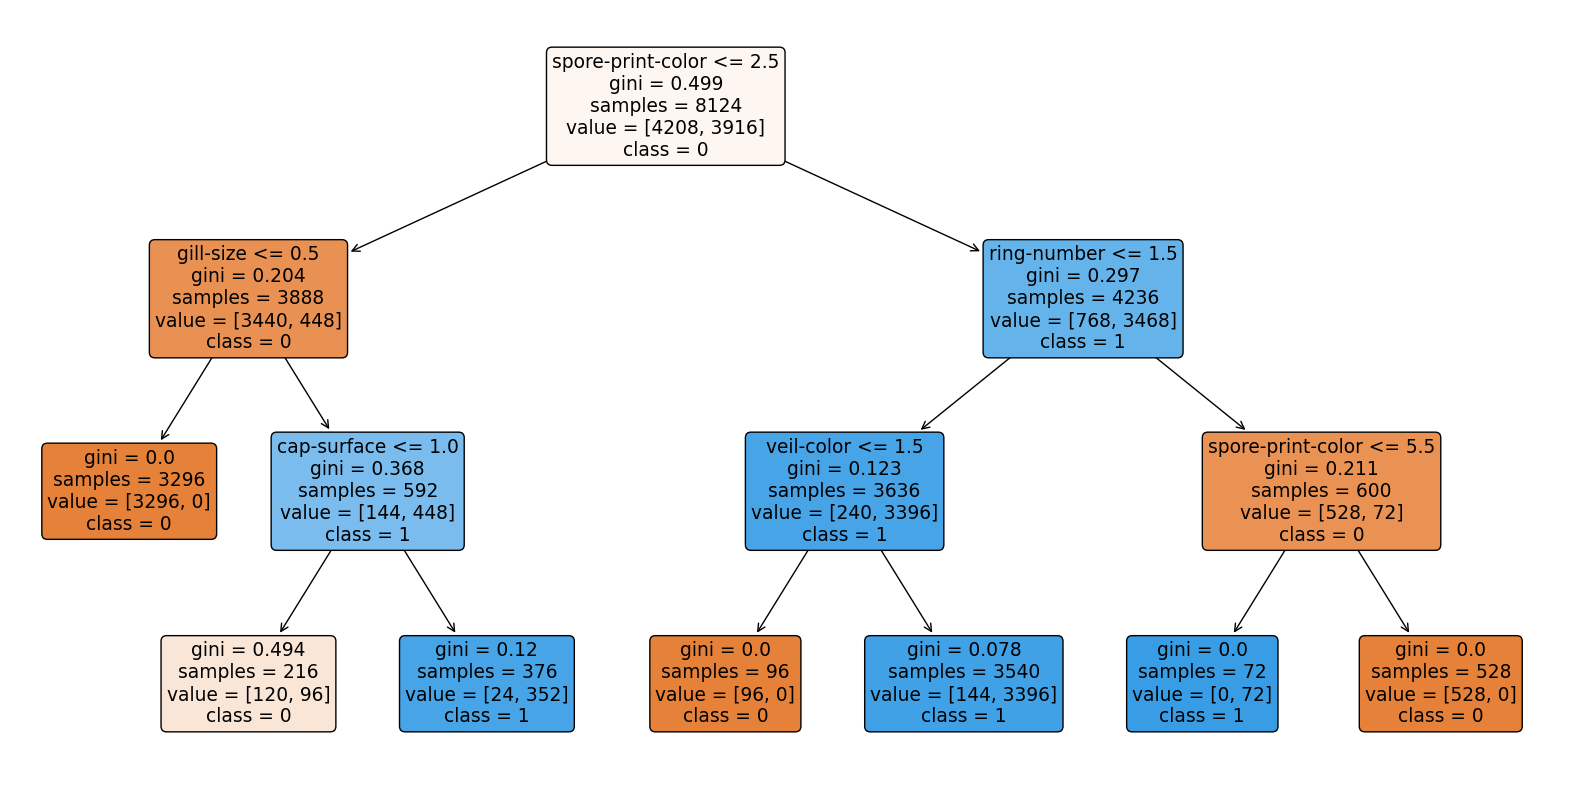

In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded[target] = le.fit_transform(df_encoded[target])  # Correct DataFrame

# Defining features and target
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# Creating a decision tree model
clf = DecisionTreeClassifier(max_depth=3)  # Using a small depth for simplicity in visualization
clf.fit(X, y)

# Plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=[str(c) for c in clf.classes_], filled=True, rounded=True)
plt.show()

In this plot, each node will display the feature used for the split, and you can see how different categories of your features are used to make decisions.

Interpreting the Decision Tree:
The first row of each node shows the condition used for the split.
The second row shows the Gini impurity of the node.
The third row shows the number of samples in the node.
The fourth row shows the distribution of the samples in each class.
The color of each node represents the predominant class.

When exploring data using dimensionality reduction and clustering techniques, the steps generally involve:

Preprocessing the Data: Encoding categorical variables, handling missing values, and scaling the features.

Dimensionality Reduction: Reducing the number of features while retaining most of the information. Principal Component Analysis (PCA) is a common method for numerical data.

Clustering: Grouping similar instances together. K-means is a commonly used clustering algorithm for numerical data.

Visualization: Visualizing the results from dimensionality reduction and clustering to draw insights.

Correlation Analysis: Identifying features that may correlate using correlation matrices or other statistical tests.

In [33]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handle categorical variables
df_encoded = df.apply(LabelEncoder().fit_transform)

# Scale features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df.columns)

In [34]:
from sklearn.decomposition import PCA
import altair as alt

# Apply PCA
pca = PCA(n_components=2)  # Adjust the number of components as necessary
principalComponents = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Visualize the first two principal components
alt.Chart(df_pca).mark_circle().encode(
    x='PC1',
    y='PC2'
).interactive()

alt.Chart(...)

In [35]:
from sklearn.cluster import KMeans

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as necessary
df_pca['cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clusters on the first two principal components
alt.Chart(df_pca).mark_circle().encode(
    x='PC1',
    y='PC2',
    color='cluster:N'
).interactive()

c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


alt.Chart(...)

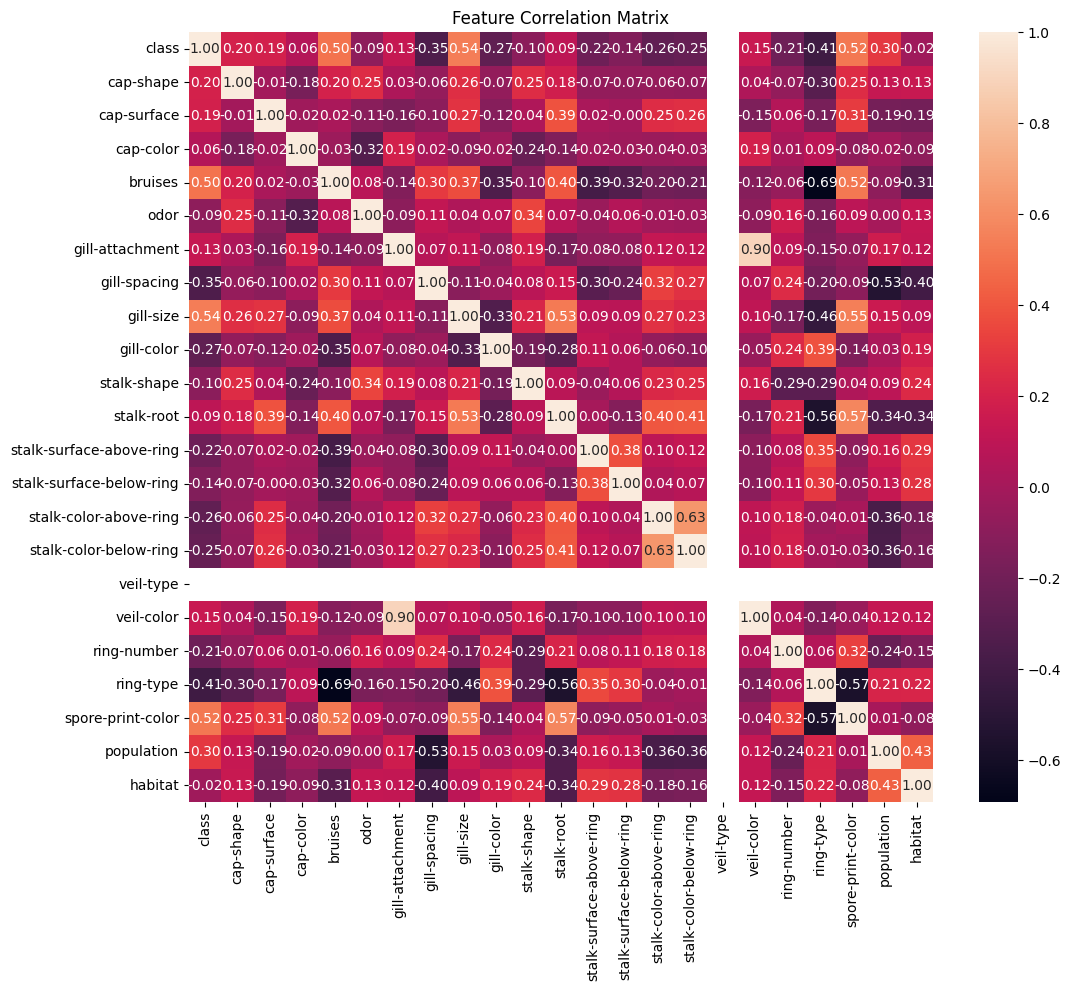

In [36]:
# Calculate correlation matrix
corr_matrix = df_encoded.corr()

# Optionally, visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

You can perform grid search for hyperparameter tuning using GridSearchCV in scikit-learn. For a decision tree, some of the parameters you might want to tune could include max_depth, min_samples_split, min_samples_leaf, and criterion.

Here is a basic example of how you might set up a grid search for a Decision Tree Classifier:

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have already encoded your categorical features and target variable
# and df_encoded is your DataFrame with encoded features and target
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the model
dt = DecisionTreeClassifier(random_state=42)

# Defining the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 2, 5, 10, 15, 20]
}

# Setting up the grid search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fitting the model
grid_search.fit(X_train, y_train)

# Printing the best parameters from the grid search
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluating the model with the best parameters on the test set
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 1.0


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [20, 30, 40],
    'min_samples_leaf': [5, 10, 15]
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),  # Adjust 'average' parameter as needed
    'recall': make_scorer(recall_score, average='macro'),  # Adjust 'average' parameter as needed
    'f1_score': make_scorer(f1_score, average='macro')  # Adjust 'average' parameter as needed
}

clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid, scoring=scoring, refit='f1_score', cv=5, return_train_score=True)

grid_search.fit(X, y)

# Best parameters based on F1 Score
print("Best Parameters: ", grid_search.best_params_)

# Score summary for all models tested
cv_results = pd.DataFrame(grid_search.cv_results_)
print(cv_results[['params', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score']])

Best Parameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}
                                               params  mean_test_accuracy  \
0   {'criterion': 'gini', 'max_depth': 10, 'min_sa...            0.878961   
1   {'criterion': 'gini', 'max_depth': 10, 'min_sa...            0.873915   
2   {'criterion': 'gini', 'max_depth': 10, 'min_sa...            0.857176   
3   {'criterion': 'gini', 'max_depth': 10, 'min_sa...            0.863700   
4   {'criterion': 'gini', 'max_depth': 10, 'min_sa...            0.866038   
5   {'criterion': 'gini', 'max_depth': 10, 'min_sa...            0.849300   
6   {'criterion': 'gini', 'max_depth': 10, 'min_sa...            0.870592   
7   {'criterion': 'gini', 'max_depth': 10, 'min_sa...            0.870592   
8   {'criterion': 'gini', 'max_depth': 10, 'min_sa...            0.849300   
9   {'criterion': 'gini', 'max_depth': 20, 'min_sa...            0.878961   
10  {'criterion': 'gini', 'max_depth': 20, 'min_

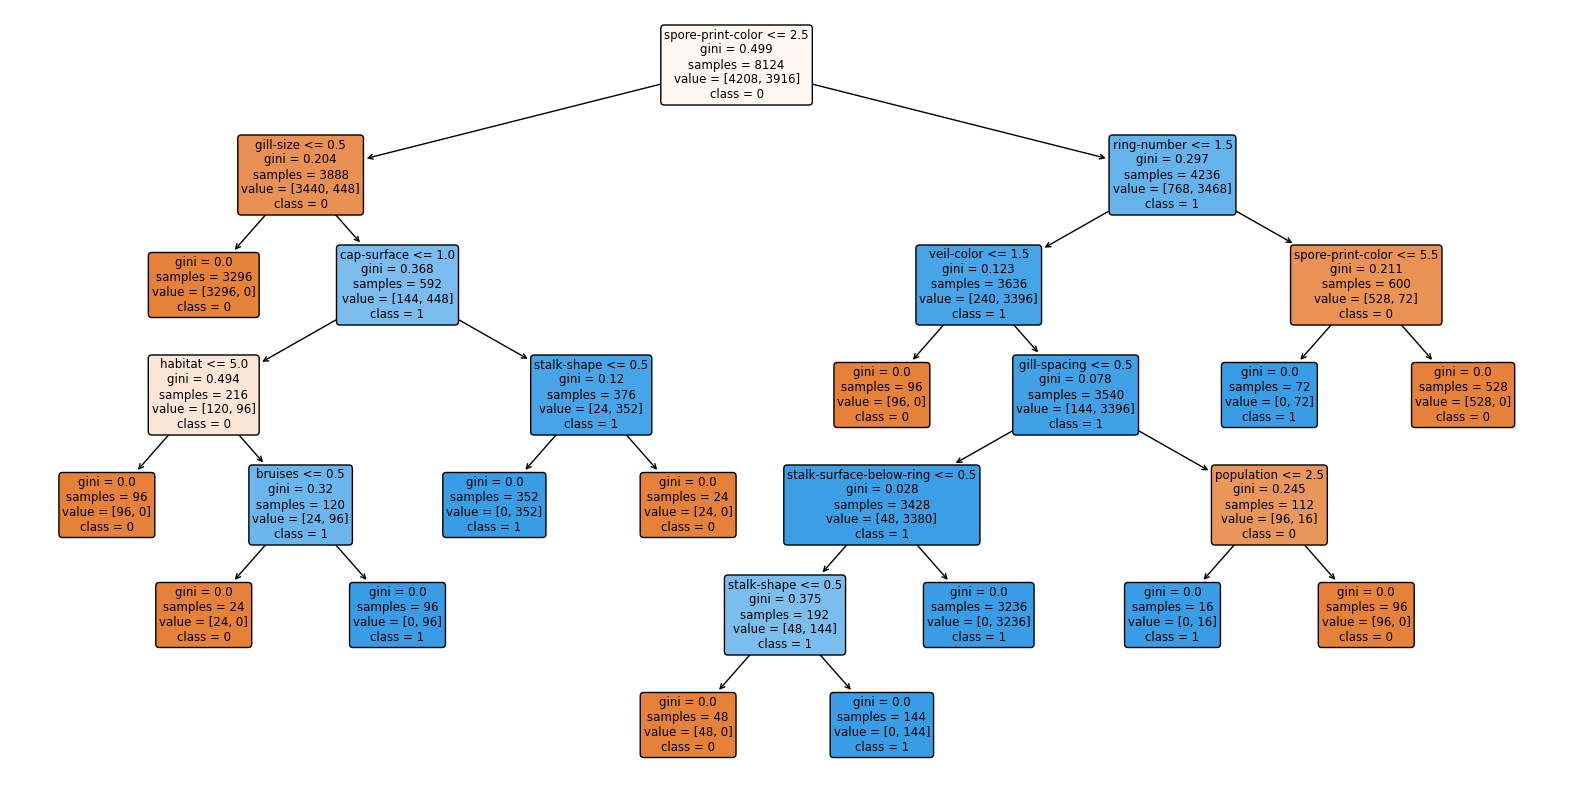

In [39]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Define best parameters
best_params = {
    'criterion': 'gini',
    'max_depth': 10,
    'min_samples_leaf': 5,
    'min_samples_split': 20
}

le = LabelEncoder()
df_encoded[target] = le.fit_transform(df_encoded[target])  # Correct DataFrame

# Defining features and target
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# Creating a decision tree model with the best parameters
clf = DecisionTreeClassifier(**best_params)  # Using best parameters found during hyperparameter tuning
clf.fit(X, y)

# Plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=[str(c) for c in clf.classes_], filled=True, rounded=True)
plt.show()